<a href="https://colab.research.google.com/github/RymCP4/STA/blob/main/Cravens_Stats_Lab_Linear_Model_Photo_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tensorspace.org/

In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [2]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [4]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p"

In [5]:
url = "https://docs.google.com/presentation/d/1jGSDuFx4aWJLdi0dG-rW_ijS3vczN1ux-ucsHGmn7ac/edit#slide=id.g1a1a0885f0f_0_0"

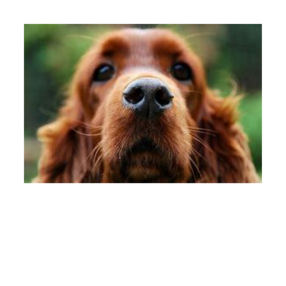

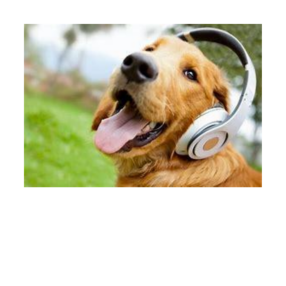

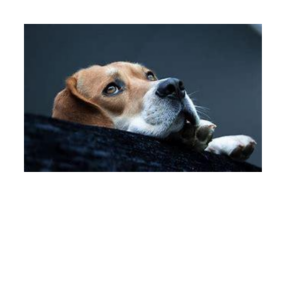

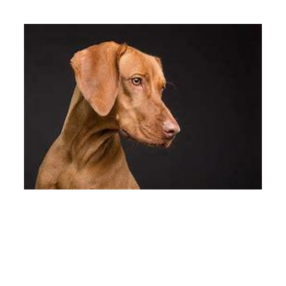

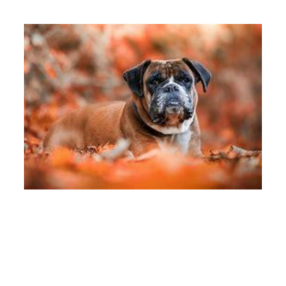

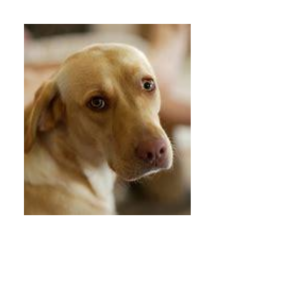

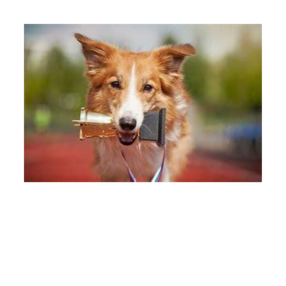

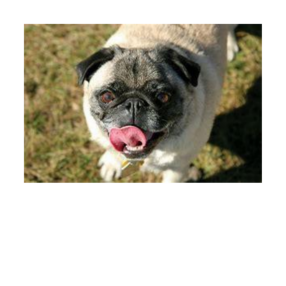

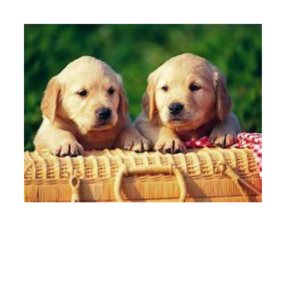

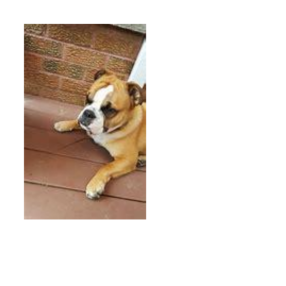

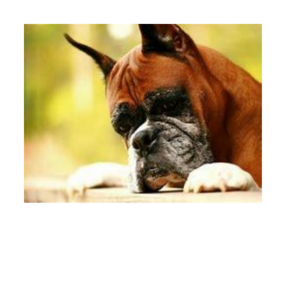

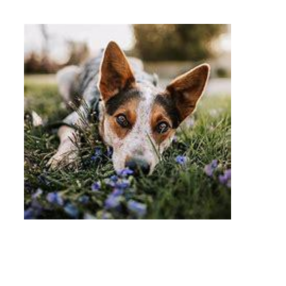

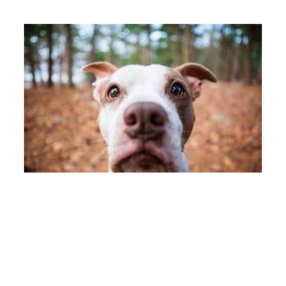

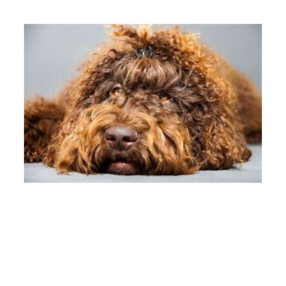

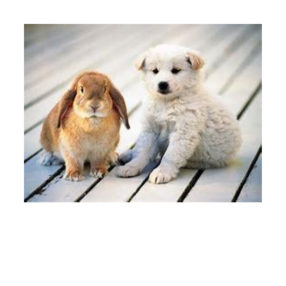

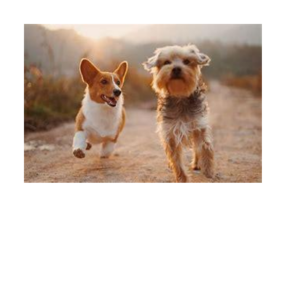

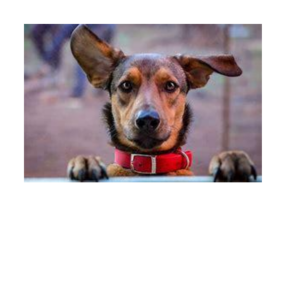

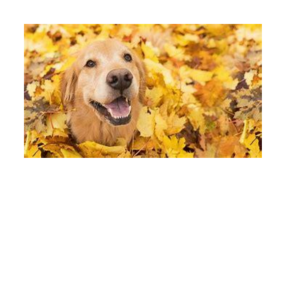

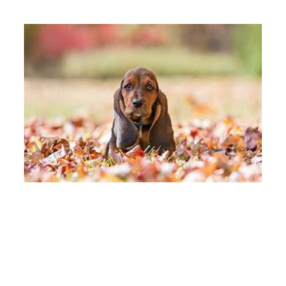

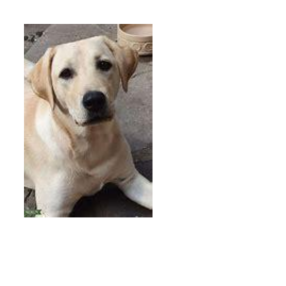

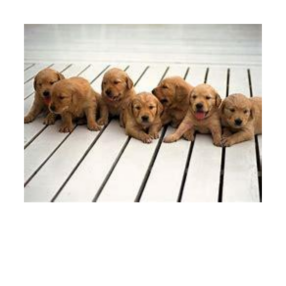

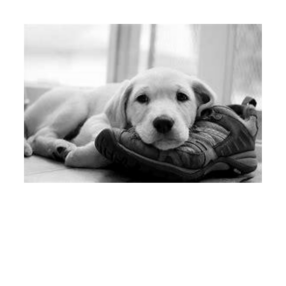

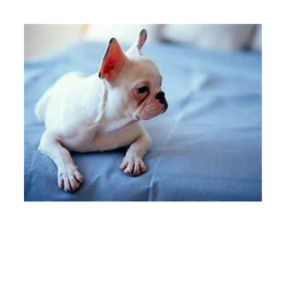

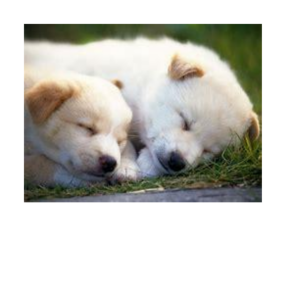

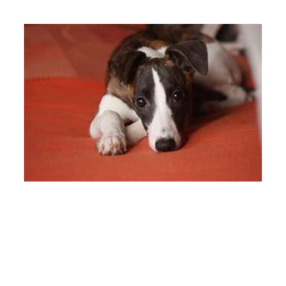

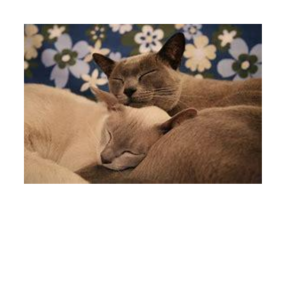

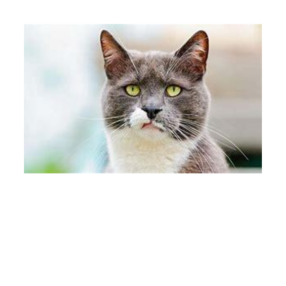

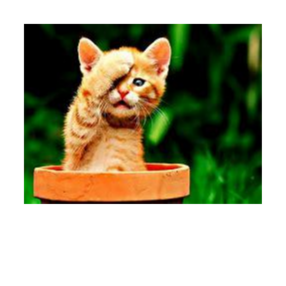

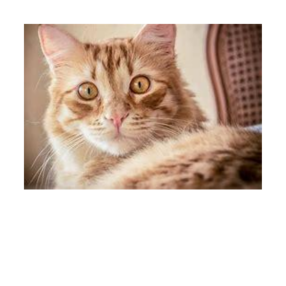

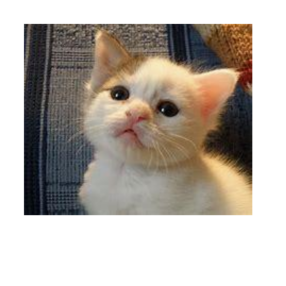

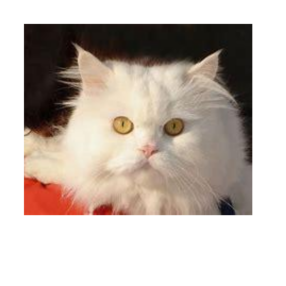

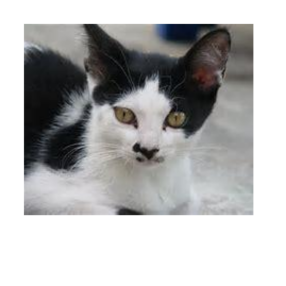

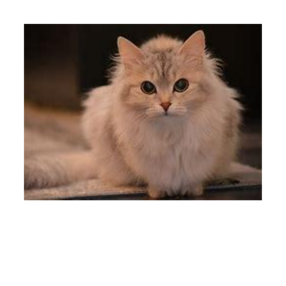

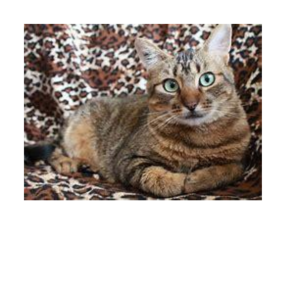

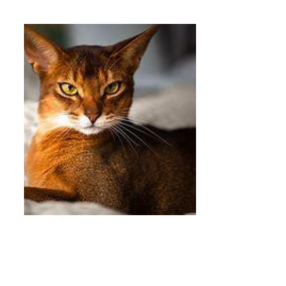

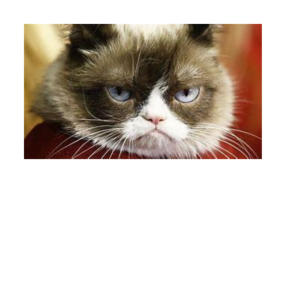

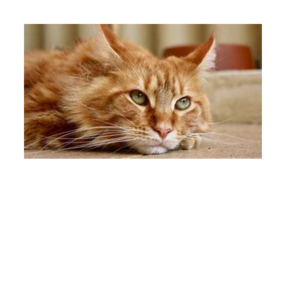

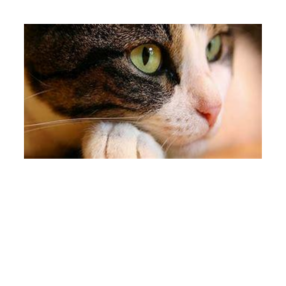

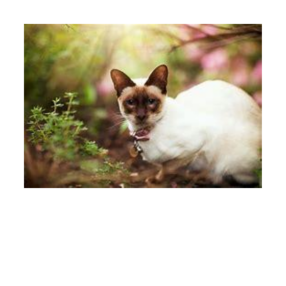

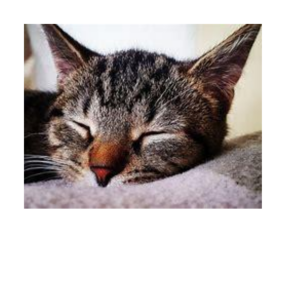

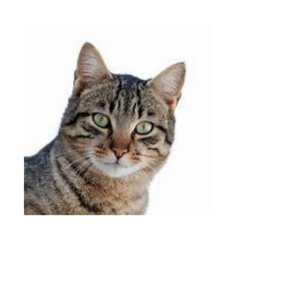

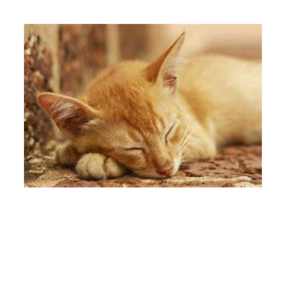

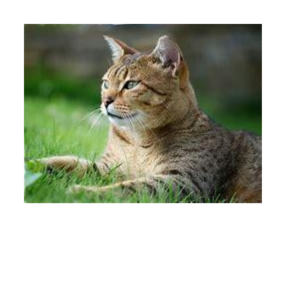

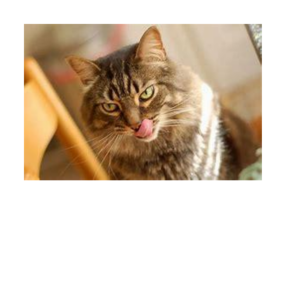

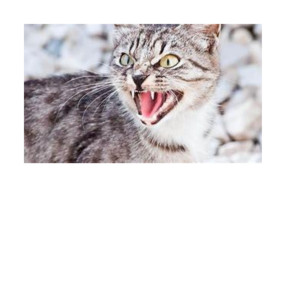

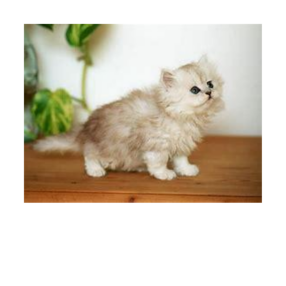

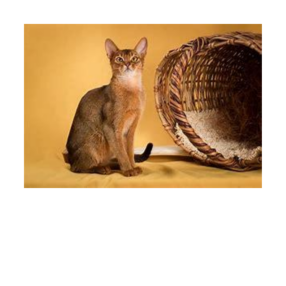

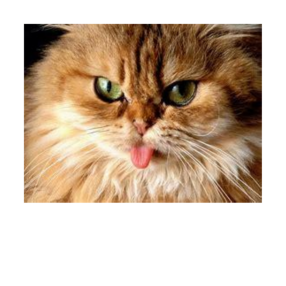

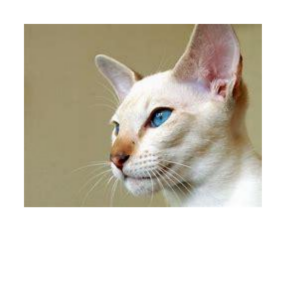

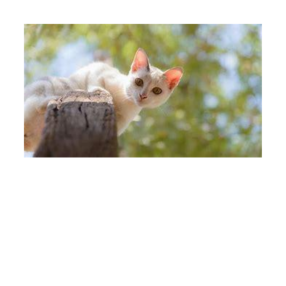

In [6]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [7]:
images.shape

torch.Size([50, 3, 224, 224])

In [8]:
model(images)

tensor([[-4.1307, -0.7008, -7.1182,  ..., -2.6914, -0.3458,  2.0529],
        [-2.3983, -1.8492, -3.7659,  ..., -3.1687,  0.8706,  3.4834],
        [-1.7551,  1.7544, -1.6213,  ..., -1.1201, -0.9373,  4.2553],
        ...,
        [-5.0887, -1.9672, -7.7641,  ..., -5.2005,  1.9114,  6.9845],
        [-2.3767,  0.9891, -0.8545,  ..., -3.2905,  4.0056,  8.5101],
        [ 0.9677,  1.7489, -2.4567,  ...,  1.3290,  2.6316,  1.1318]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [9]:
y = model(images)

In [10]:
y.shape

torch.Size([50, 1000])

In [11]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [12]:
for i in list(guesses):
    print(labels[i])

Irish setter, red setter
Saluki, gazelle hound
Chihuahua
vizsla, Hungarian pointer
Brabancon griffon
vizsla, Hungarian pointer
basenji
pug, pug-dog
golden retriever
Cardigan, Cardigan Welsh corgi
boxer
Cardigan, Cardigan Welsh corgi
American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier
miniature poodle
golden retriever
Yorkshire terrier
Staffordshire bullterrier, Staffordshire bull terrier
golden retriever
hippopotamus, hippo, river horse, Hippopotamus amphibius
Labrador retriever
isopod
soccer ball
piggy bank, penny bank
chow, chow chow
Border collie
studio couch, day bed
tabby, tabby cat
screen, CRT screen
tabby, tabby cat
Persian cat
Persian cat
papillon
Persian cat
tabby, tabby cat
Egyptian cat
carton
screen, CRT screen
tabby, tabby cat
Chihuahua
tabby, tabby cat
tabby, tabby cat
Persian cat
lynx, catamount
tabby, tabby cat
lynx, catamount
Persian cat
chime, bell, gong
Persian cat
Egyptian cat
Yorkshire terrier


In [13]:
Y = np.zeros(50,)
Y[25:] = 1

In [14]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
X = y.detach().cpu().numpy() 

In [16]:
X.shape

(50, 1000)

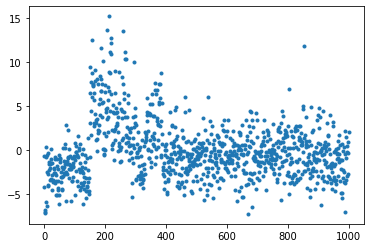

In [17]:
plt.plot(X[0],'.')

In [18]:
X[0]

array([-4.13065147e+00, -7.00769544e-01, -7.11818695e+00, -7.08234501e+00,
       -6.81298542e+00,  3.23399335e-01, -5.86164665e+00, -8.00945997e-01,
       -5.19749880e-01, -2.46477604e+00, -6.37277937e+00, -3.96851182e+00,
       -3.50842208e-01, -4.08476925e+00, -2.71668887e+00, -1.51154470e+00,
       -1.37798870e+00, -2.22590876e+00, -1.55984402e+00, -2.07331133e+00,
       -3.39556241e+00,  1.51685983e-01, -3.21637535e+00, -1.41370726e+00,
       -9.63481367e-01, -1.43955076e+00, -4.48491764e+00, -2.85058212e+00,
       -3.51823020e+00, -3.62112403e+00, -3.34118938e+00, -2.08261466e+00,
       -2.05115628e+00, -2.54146695e+00, -3.72100210e+00, -2.61458015e+00,
       -7.38647938e-01, -9.78525758e-01, -3.54748559e+00, -5.07903814e+00,
       -2.79066539e+00, -5.07610750e+00, -1.02969205e+00, -1.74619257e+00,
       -4.33657598e+00, -3.50605416e+00, -4.47635984e+00, -2.14069986e+00,
       -5.85302711e-01, -5.03780079e+00, -6.09553671e+00, -1.02548885e+00,
       -8.50862980e-01, -

In [19]:
np.argmax(X[0])

213

In [20]:
labels[948]

'Granny Smith'

In [21]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [22]:
for i in top_ten:
  print(labels[i])

Irish setter, red setter
golden retriever
chow, chow chow
cocker spaniel, English cocker spaniel, cocker
Blenheim spaniel
Sussex spaniel
tennis ball
Norfolk terrier
miniature poodle
Brittany spaniel


TypeError: ignored

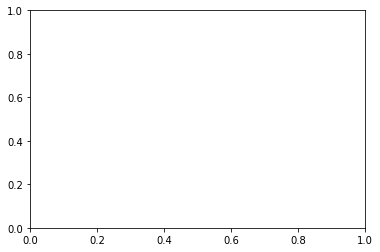

In [37]:
plt.hist(X[0])

In [38]:
X = GPU_data(X)
Y = GPU_data(Y)

<ipython-input-2-4608b466ff03>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


In [39]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [40]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [41]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [42]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [43]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [44]:
X.shape

torch.Size([50, 1000])

In [45]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [46]:
def model(x,w):

    return x@w[0]

In [47]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [48]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))
